In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("iris.csv")

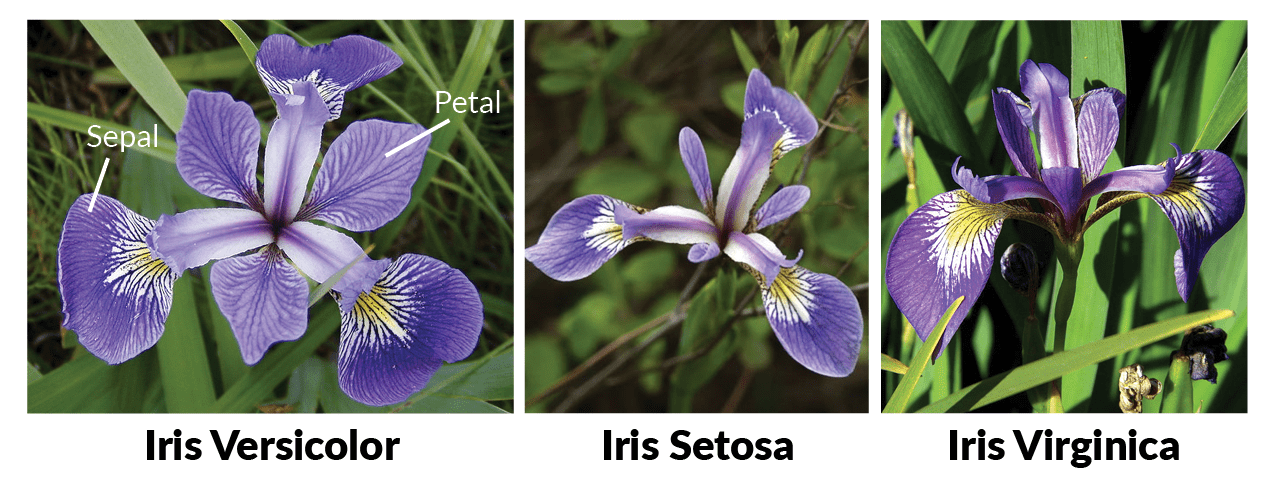

In [4]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0         5.100        3.500         1.400        0.200  setosa
1         4.900        3.000         1.400        0.200  setosa
2         4.700        3.200         1.300        0.200  setosa
3         4.600        3.100         1.500        0.200  setosa
4         5.000        3.600         1.400        0.200  setosa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T

count  mean   std   min   25%   50%   75%   max
sepal_length 150.000 5.843 0.828 4.300 5.100 5.800 6.400 7.900
sepal_width  150.000 3.057 0.436 2.000 2.800 3.000 3.300 4.400
petal_length 150.000 3.758 1.765 1.000 1.600 4.350 5.100 6.900
petal_width  150.000 1.199 0.762 0.100 0.300 1.300 1.800 2.500

In [7]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

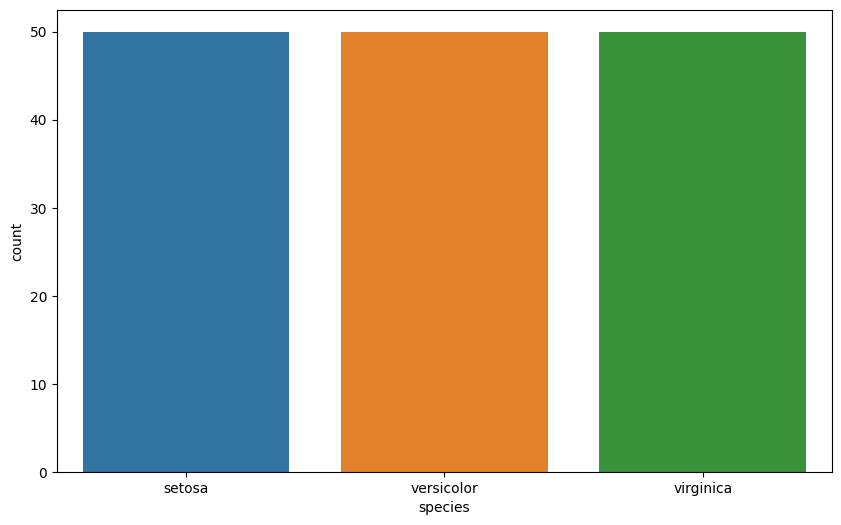

In [8]:
sns.countplot(x = df["species"]);

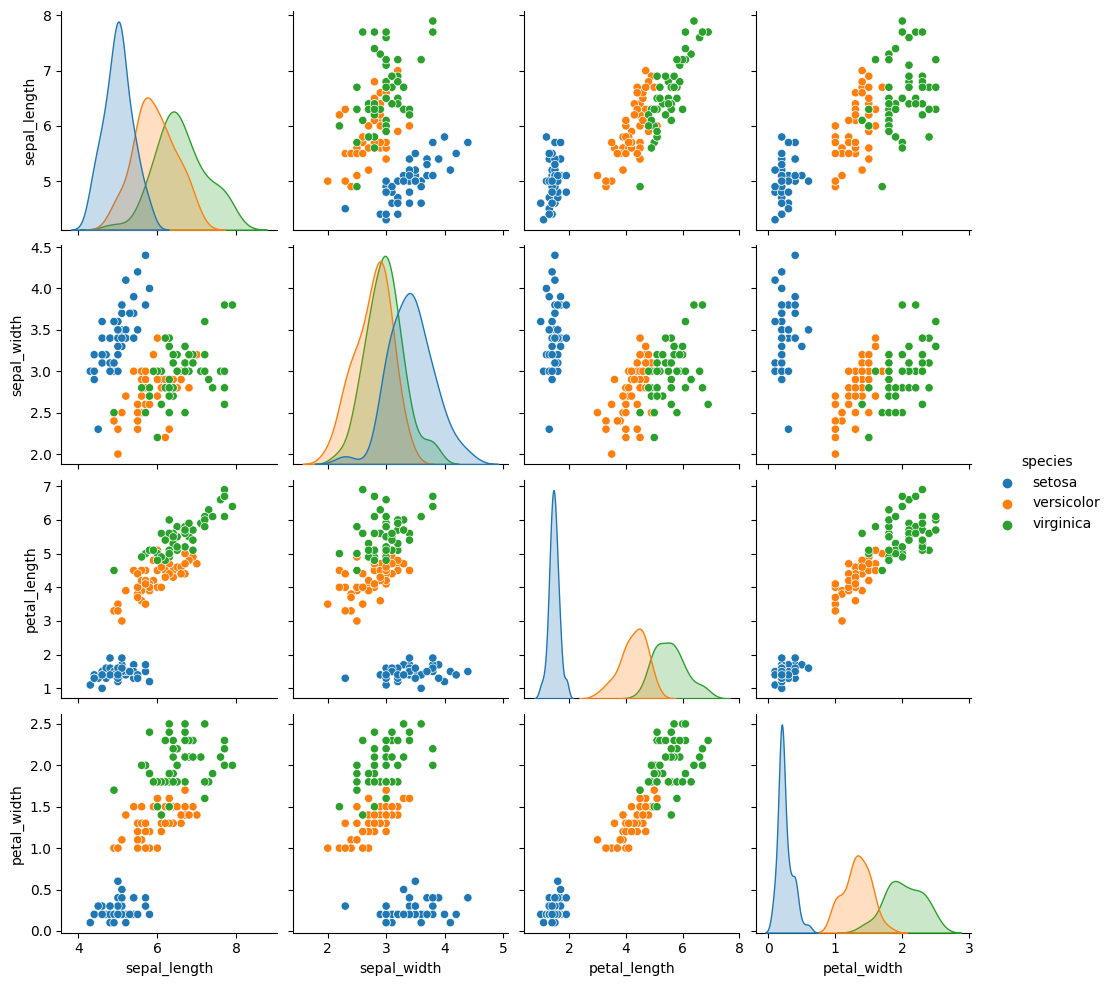

In [9]:
sns.pairplot(df, hue = "species");

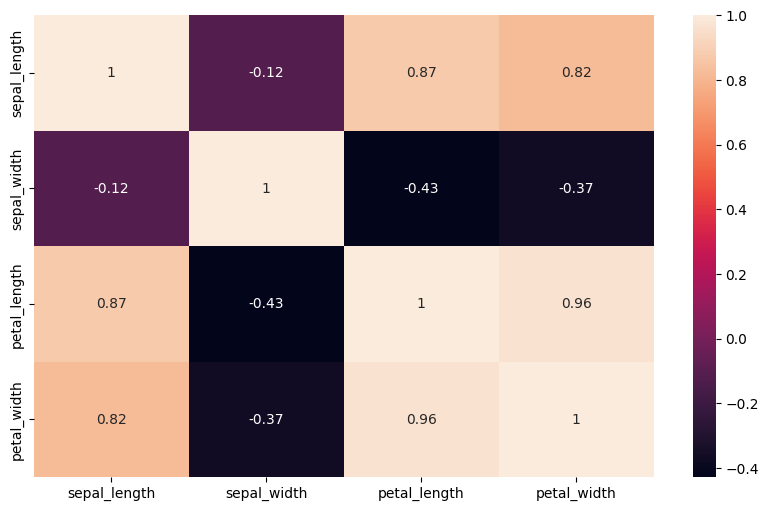

In [10]:
sns.heatmap(df.corr(), annot = True);

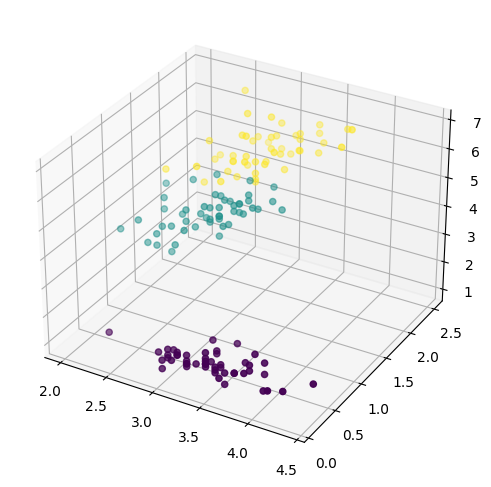

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
ax.scatter(df["sepal_width"], df["petal_width"], df["petal_length"], c=colors);

In [12]:
import plotly.express as px
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
fig = px.scatter_3d(df, x="sepal_width", y="petal_width", z="petal_length", color=colors)
fig.show()

## Train | Test Split

In [13]:
X = df.drop("species", axis = 1)
y = df["species"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

## With Default Parameters

In [19]:
log_model = LogisticRegression()

In [20]:
log_model.fit(X_train_scaled, y_train)
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.97574947e-01, 2.42503754e-03, 1.54293514e-08],
       [9.92629804e-01, 7.37006329e-03, 1.32922697e-07],
       [9.73790847e-01, 2.62066733e-02, 2.47982136e-06],
       [4.02847906e-04, 3.54599015e-01, 6.44998137e-01],
       [9.14885119e-03, 8.51714939e-01, 1.39136210e-01],
       [1.01797139e-03, 3.28773330e-01, 6.70208699e-01],
       [6.10449788e-04, 6.45974426e-01, 3.53415124e-01],
       [8.19190985e-03, 8.86796207e-01, 1.05011883e-01],
       [2.20541739e-04, 1.87962520e-01, 8.11816938e-01],
       [9.13848213e-01, 8.61499725e-02, 1.81402681e-06],
       [7.33058032e-04, 1.60762050e-01, 8.38504892e-01],
       [9.97950399e-01, 2.04959066e-03, 1.07662632e-08],
       [9.40317983e-01, 5.96797910e-02, 2.22606251e-06],
       [1.77758388e-06, 2.64146465e-02, 9.73583576e-01],
       [5.71832608e-03, 3.89263746e-01, 6.05017928e-01],
       [1.35583879e-02, 9.04991459e-01, 8.14501527e-02],
       [9.63103339e-02, 8.46121697e-01, 5.75679695e-02],
       [5.14009832e-02, 8.75025

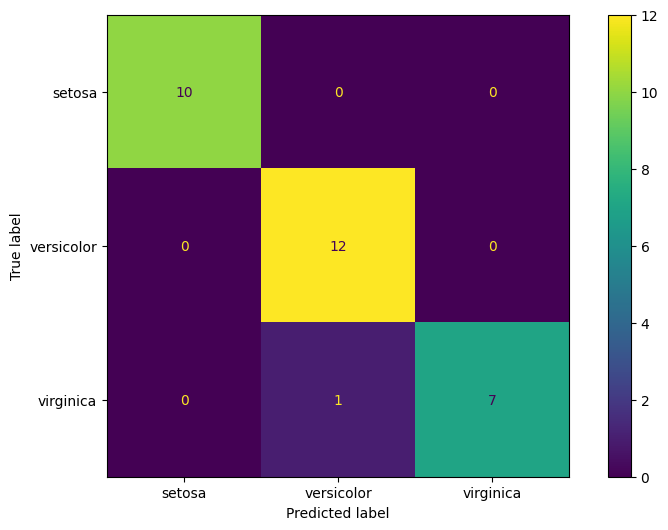

In [21]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test);

In [22]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [23]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



## Cross Validate

In [24]:
from sklearn.model_selection import cross_validate
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.950
test_precision_weighted   0.960
test_recall_weighted      0.950
test_f1_weighted          0.949
dtype: float64

#### Cross VAlidate for Versicolor

In [25]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])

In [26]:
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_versicolor":f1_versicolor,
                                                                   "precision_versicolor":precision_versicolor,
                                                                   "recall_versicolor":recall_versicolor}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_versicolor          0.924
test_precision_versicolor   0.940
test_recall_versicolor      0.925
dtype: float64

In [27]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)

sepal_length  sepal_width  petal_length  petal_width     species  \
114         5.800        2.800         5.100        2.400   virginica   
129         7.200        3.000         5.800        1.600   virginica   
32          5.200        4.100         1.500        0.100      setosa   
16          5.400        3.900         1.300        0.400      setosa   
42          4.400        3.200         1.300        0.200      setosa   
80          5.500        2.400         3.800        1.100  versicolor   
127         6.100        3.000         4.900        1.800   virginica   
93          5.000        2.300         3.300        1.000  versicolor   
90          5.500        2.600         4.400        1.200  versicolor   
50          7.000        3.200         4.700        1.400  versicolor   

           pred  pred_proba_setosa  pred_proba_versicolar  \
114   virginica              0.000                  0.029   
129   virginica              0.000                  0.355   
32       setosa              0.998                  0.002   
16       setosa              0.993                  0.007   
42       setosa              0.985                  0.015   
80   versicolor              0.019                  0.948   
127   virginica              0.006                  0.389   
93   versicolor              0.051                  0.936   
90   versicolor              0.022                  0.894   
50   versicolor              0.009                  0.852   

     pred_proba_virginica  
114                 0.971  
129                 0.645  
32                  0.000  
16                  0.000  
42                  0.000  
80                  0.033  
127                 0.605  
93                  0.013  
90                  0.084  
50                  0.139

## With Best Parameters (GridSearchCV)

In [28]:
from pandas_profiling import ProfileReport

In [29]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
log_model = LogisticRegression(max_iter=5000)

In [37]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)  

param_grid = {"penalty" : penalty,
              "C" : C,
              }
grid_model = GridSearchCV(log_model,
                          param_grid=param_grid,
                          cv=5,
                          n_jobs = -1)  ##n_jobs focus all gpu to fit the model

In [38]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [39]:
grid_model.best_params_

{'C': 16.23776739188721, 'penalty': 'l2'}

In [42]:
grid_model.best_score_

0.9666666666666668

In [45]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

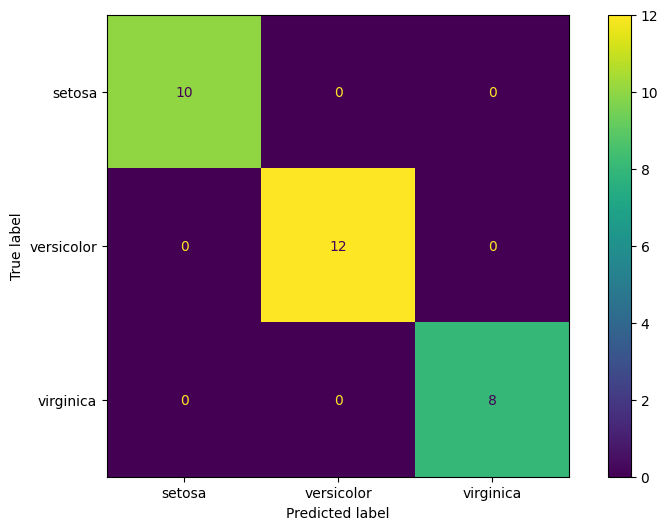

In [48]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test_scaled, y_test)

In [40]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.97      0.97        38
   virginica       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [49]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score, auc, roc_curve, average_precision_score

In [52]:
#RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test)

#plt.show()    ##balance datalarda

##binary model class fazla oldugu için hata veriyordu

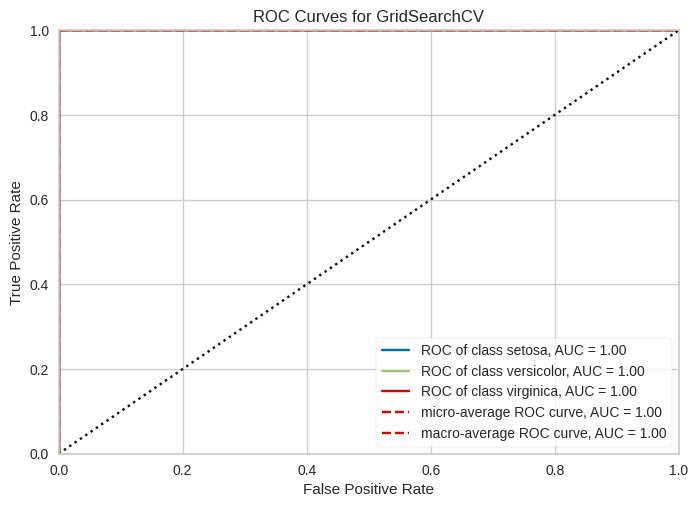

In [54]:
from yellowbrick.classifier import ROCAUC

model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

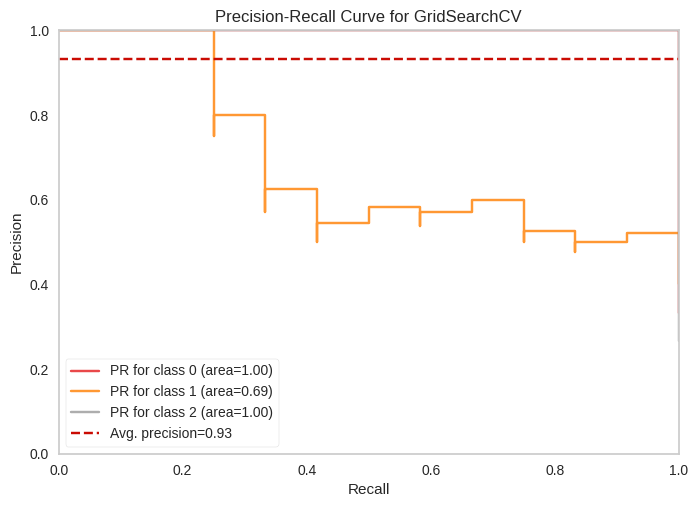

In [55]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True, #bunu vermezsek binary gibi calısır
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

##data balance oldugu için ROCAOC score shows true score
##unbalance datada PrecisionRecall score kullanılır.

## Final Model and Model Deployment

In [56]:
scaler = StandardScaler().fit(X) ##bütün datayı fit ediyoruz

In [57]:
import pickle
pickle.dump(scaler, open("scaler_iris", "wb")) ##scale modeli kayıt ediyoru

In [58]:
X_scaled = scaler.transform(X) ##transform olmadan önce pickle ile kayıt etmemiz lazım

In [59]:
final_model = LogisticRegression().fit(X_scaled, y) ##finaş modelimi oluşturuyorum

In [69]:
pickle.dump(final_model, open("final_model_iris", "wb"))  #save the final model

In [70]:
X.describe().T

count  mean   std   min   25%   50%   75%   max
sepal_length 150.000 5.843 0.828 4.300 5.100 5.800 6.400 7.900
sepal_width  150.000 3.057 0.436 2.000 2.800 3.000 3.300 4.400
petal_length 150.000 3.758 1.765 1.000 1.600 4.350 5.100 6.900
petal_width  150.000 1.199 0.762 0.100 0.300 1.300 1.800 2.500

In [71]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]
          }

In [72]:
sample = pd.DataFrame(my_dict)
sample

sepal_length  sepal_width  petal_length  petal_width
0         4.500        2.200         1.300        0.200
1         5.800        3.000         4.300        1.300
2         7.500        4.200         6.500        2.300

In [73]:
scaler_iris = pickle.load(open("scaler_iris", "rb"))

In [74]:
sample_scaled = scaler_iris.transform(sample)
sample_scaled

array([[-1.62768839, -1.97355361, -1.39706395, -1.3154443 ],
       [-0.05250608, -0.13197948,  0.30805885,  0.13250973],
       [ 2.00734772,  2.63038172,  1.55848225,  1.44883158]])

In [76]:
final_model = pickle.load(open("final_model_iris", "rb"))

In [77]:
predictions = final_model.predict(sample_scaled)
prediction_proba = final_model.predict_proba(sample_scaled)

In [79]:
sample["predictions"] = predictions
sample["pred_prob_setosa"] = prediction_proba[:,0]
sample["pred_prob_versicolor"] = prediction_proba[:,1]
sample["pred_proba_virginica"] = prediction_proba[:,2]
sample

sepal_length  sepal_width  petal_length  petal_width predictions  \
0         4.500        2.200         1.300        0.200      setosa   
1         5.800        3.000         4.300        1.300  versicolor   
2         7.500        4.200         6.500        2.300   virginica   

   pred_prob_setosa  pred_prob_versicolor  pred_proba_virginica  
0             0.712                 0.288                 0.000  
1             0.044                 0.890                 0.066  
2             0.000                 0.021                 0.979

## The End